# Medical Appointment No Shows Case Study

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#assess">Data Assessing</a></li>
    <li><a href="#clean">Data Cleaning</a></li>
   </ul> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset we are working with is [Medical Appointment No Shows Dataset](https://www.kaggle.com/joniarroba/noshowappointments) which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### *Questions:*

-   ##### <a href='#1'> **1**:  What hour, weekday, month and date did patients usually schedule their appointment(s) at/on? </a>

-   ##### <a href='#2'> **2**:  What weekday, month and date are associated with the highest number of absent patients?</a>

-   ##### <a href='#3'> **3**:  Which gender is more likely to not show up to their appointment?</a>

-   ##### <a href='#4'> **4**:  Does the gender of the patient with scholarship related to patients who didn't show up to their appointments?</a>

-   ##### <a href='#5'> **5**:  Does receiving an SMS message would give an indication that the patient will show up to the appointment and vice versa?</a>

-  ##### <a href='#6'> **6**:  Are handicapped patients less likely to show up to their appointments?</a>




In [1]:
#Importing necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

In [2]:
#loading the dataset into pandas dataframe.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
96019,9.892345e+13,5708317,M,2016-05-17T11:00:49Z,2016-06-06T00:00:00Z,63,SANTOS DUMONT,0,0,0,0,0,1,No
19312,1.563681e+11,5693541,F,2016-05-13T07:23:06Z,2016-05-13T00:00:00Z,1,BELA VISTA,0,0,0,0,0,0,No
71112,7.776927e+14,5454551,F,2016-03-10T14:33:46Z,2016-05-18T00:00:00Z,44,CENTRO,0,0,0,0,0,0,Yes
32065,9.293546e+11,5663407,M,2016-05-05T09:58:58Z,2016-05-05T00:00:00Z,52,JABOUR,0,0,0,0,0,0,No
110471,3.187119e+14,5781360,F,2016-06-07T09:23:18Z,2016-06-07T00:00:00Z,84,RESISTÊNCIA,0,1,0,0,0,0,No
51192,3.576496e+13,5673594,F,2016-05-09T09:36:05Z,2016-05-09T00:00:00Z,8,MATA DA PRAIA,0,0,0,0,0,0,Yes
46439,4.119817e+11,5677666,F,2016-05-10T07:29:21Z,2016-05-10T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,0,No
25236,4.492771e+12,5667747,F,2016-05-06T08:05:32Z,2016-05-30T00:00:00Z,31,JESUS DE NAZARETH,0,0,0,0,0,0,No
5508,9.682445e+13,5679326,F,2016-05-10T09:46:59Z,2016-05-12T00:00:00Z,40,MARIA ORTIZ,0,0,0,0,0,0,No
48641,8.679512e+11,5612472,F,2016-04-25T08:19:19Z,2016-05-19T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes


<a id='wrangling'></a>
## Data Wrangling


> In this section we will access and clean our dataset's issues to promote findings of our analysis process. 

<a id='assess'></a>
### Data Assessing
> In this section we will access our dataset for quality & tidiness issues


In [3]:
df.shape

(110527, 14)

In [4]:
#checking the df for any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- no null values which is good, now lets check for other quality and tidiness issues.

- one small typo is `Hipertension` column rather than 'Hypertension', I know that it's Hipertensión in spanish but it will cause no harm to change the name of the column.

- `ScheduledDay` and `AppointmentDay` columns are of object type rather than datetime type.

In [5]:
#check the values of each column in the df.
for column in df.columns:
    print(df[column].value_counts())

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

- in `Age` column there is a value of '-1' for only one record. 

- in `Handcap` column there are values of 0, 1, 2, 3, 4 rather than only 0 for not handicapped and 1 for handicapped 
and there is a typo in the column name so we will change it to be 'Handicap'.

- since the `No-show` is the only column with Yes and No values rather than 0 and 1, also its terminology may cause 
some confusion we will change its name to be more clear. 


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Summery of found issues:
- `ScheduledDay` and `AppointmentDay` columns are of object type rather than datetime type.
- in `Age` column there is a value of '-1' for only one record. 
- in `Handcap` column there are values of 0, 1, 2, 3, 4 rather than only 0 for not handicapped and 1 for handicapped and there is a typo in the column name so we will change it to be 'Handicap'. 
- small typo is `Hipertension` column name rather than 'Hypertension'.
- `No-show` is the only column with Yes and No values rather than 0 and 1, also its terminology may cause some confusion so we will change its name to be more clear. 

<a id='clean'></a>
### Data Cleaning
> In this section we will clean our dataset based on the quality & tidiness issues that we found from the previous section.

In [7]:
# Before moving forward we need to make a copy of the dataframe to save our cleaned dataframe in.
df_cleaned = df.copy()

##### Change `ScheduledDay` and `AppointmentDay` columns to datetime type.

In [8]:
# we can see that they are of object type.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
df_cleaned.ScheduledDay=pd.to_datetime(df_cleaned.ScheduledDay)
df_cleaned.AppointmentDay=pd.to_datetime(df_cleaned.AppointmentDay)

In [10]:
# now they are of datatime type.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### Drop patient with `Age` of '-1' value.

In [11]:
# the patient with '-1' age value
df_cleaned[df_cleaned.Age==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
# drop the row of this patient using its index.
df_cleaned.drop(index=df_cleaned.query('Age==-1').index,inplace=True)

In [13]:
# now checking if he exists anymore.
df_cleaned.query('Age==-1').any().sum()

0

##### Drop any value other than 0 or 1 in `Handcap` column and correct it to be 'Handicap'.
> Since we don't have enough information to tell if patients with other values than 0 and 1 in `Handcap` column are handicapped or not.

In [14]:
# patients having 2, 3 or 4 in `Handcap` column.
df_cleaned[(df_cleaned.Handcap != 1) & (df_cleaned.Handcap != 0) ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29 10:08:48,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29 08:13:59,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,No
2213,3.423831e+09,5640766,F,2016-04-29 11:22:50,2016-04-29,29,VILA RUBIM,0,0,0,0,2,0,No
2214,2.754718e+12,5640760,M,2016-04-29 11:22:20,2016-04-29,55,DO QUADRO,0,0,0,0,3,0,No
2673,4.415275e+13,5589893,M,2016-04-15 13:06:05,2016-04-29,17,SANTA TEREZA,0,0,0,0,2,1,No
5424,1.647280e+12,5647342,M,2016-05-02 13:24:36,2016-05-04,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes
5467,4.555225e+12,5689883,F,2016-05-12 09:10:28,2016-05-16,10,BENTO FERREIRA,0,0,0,0,2,0,No


In [15]:
df_cleaned.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [16]:
# drop these patients by using the index of their rows.
df_cleaned.drop(index=df_cleaned.query('(Handcap!=1) & (Handcap!=0)').index,inplace=True)

#Correct the column name.
df_cleaned.rename(columns={"Handcap": "Handicap"},inplace=True)

In [17]:
# check for any value other than 0 or 1 in `Handicap` column
df_cleaned.Handicap.value_counts()

0    108285
1      2042
Name: Handicap, dtype: int64

##### Rename `Hipertension` column as 'Hypertension'.

In [18]:
#check for the old name of the column
df_cleaned.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [19]:
df_cleaned.rename(columns={"Hipertension": "Hypertension"},inplace=True)

In [20]:
# now check for the new name of the column
df_cleaned.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

##### Rename `No-show` column as 'Showed' with replacement of No to be 1 and Yes to be 0.

In [21]:
# values of the old column.
df_cleaned['No-show'].value_counts()

No     88049
Yes    22278
Name: No-show, dtype: int64

In [22]:
# rename the column with a clearer name and change the values to the corrosponding name of the new column.
df_cleaned.rename(columns={"No-show": "Showed"},inplace=True)
df_cleaned.Showed.replace(['No','Yes'],[1,0],inplace=True)

In [23]:
# values of the new column.
# Note: now the patient who showed up will have a value of 1 in `Showed` column and 0 if they didn't show up.
df_cleaned.Showed.value_counts()

1    88049
0    22278
Name: Showed, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
> Now in this section of our analysis we try to ask questions to seek out the affecting factors and characteristics of the patients who are most likely to not show to their appointment.



In [24]:
# plots functions.

def bar_plot(data, figsize=(12,6),xlabel= '',ylabel = '', title= ''):
    data.plot(kind='bar',figsize= figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    
def double_bar_plot(labels, width= 0.35, figsize=(12,6), bars1_label= '',bars2_label= '',bars1='' ,bars2 = '',
                    xlabel = '', ylabel = '', title = ''):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars


    fig, ax = plt.subplots(figsize = figsize)
    rects1 = ax.bar(x - width/2, bars1, width, label=bars1_label)
    rects2 = ax.bar(x + width/2, bars2, width, label=bars2_label)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Show the value of each bar above the bar itself.
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
   

def barh_plot(data, figsize=(12,6),colormap ='Accent',xlabel= '', title= ''):
    data.plot(kind= "barh", stacked=True ,figsize= figsize, colormap= colormap)
    for  location,value in enumerate(data):
        plt.text(value,location, str(value)[0:5])
        plt.xlabel(xlabel)
        plt.title(title);


In [25]:
def grouping(group_by):
    df_1=df_cleaned.groupby(group_by).Showed.value_counts().to_frame()
    df_1.rename(columns={"Showed":"No. of Appointments"},inplace=True)
    df_1['Perc']= df_cleaned.groupby(group_by).Showed.value_counts(normalize=True,sort = False)*100
    return df_1

# gender=df_cleaned.groupby('Gender').Showed.value_counts().to_frame()
# gender.rename(columns={"Showed":"No. of Appointments"},inplace=True)
# gender['Perc']= df_cleaned.groupby('Gender').Showed.value_counts(normalize=True,sort = False)*100
# gender

<a id='1'></a>

### Question 1: What hour, weekday, month and date did patients usually schedule their appointment(s) at/on?

In [26]:
# select the hour that the patient scheduled his/her appointment at from `ScheduledDay` column.
scheduled_hour = df_cleaned.ScheduledDay.dt.hour.value_counts()
scheduled_hour

7     19192
8     15326
9     12792
10    11032
14     9112
13     9018
11     8439
15     8054
16     5536
12     5412
17     2908
6      1576
18     1339
19      488
20      100
21        3
Name: ScheduledDay, dtype: int64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  


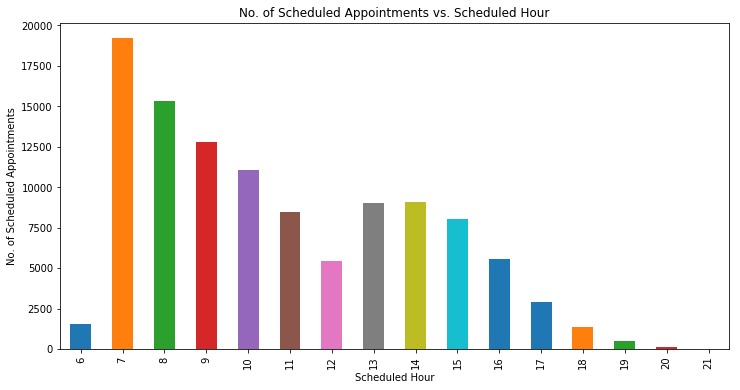

In [27]:
# plot the scheduled_hour
bar_plot(data = scheduled_hour.sortlevel(),
             xlabel= 'Scheduled Hour',
             ylabel = 'No. of Scheduled Appointments',
             title= 'No. of Scheduled Appointments vs. Scheduled Hour');

# scheduled_hour.sortlevel().plot(kind='bar',figsize=(12, 6))
# plt.xlabel('Scheduled Hour')
# plt.ylabel('No. of Scheduled Appointments')
# plt.title('No. of Scheduled Appointments vs. Scheduled Hour');


>This graph shows the activity distribution of scheduled appointment hours. Clearly, we can notice that patient usually schedule their appointments in the morning most likely from 7 am to 10 am as the number of scheduled decreases in the afternoon period and become very rare to schedule their appointments after 7 pm.

In [28]:
scheduled_weekday_perc = df_cleaned.ScheduledDay.dt.weekday_name.value_counts(normalize=True)*100
scheduled_weekday_perc.plot(labels=scheduled_weekday.index,kind='pie',title='Scheduled Weekday', figsize=(7,7),
                           startangle=90, autopct='%1.2f%%',explode=(0.15, 0, 0, 0, 0, 0));



NameError: name 'scheduled_weekday' is not defined

In [ ]:
scheduled_month = df_cleaned.ScheduledDay.dt.month.value_counts()
scheduled_month

In [ ]:
scheduled_date = df_cleaned.ScheduledDay.dt.date.value_counts()
scheduled_date

>  Based on our dataset, we find that May had the most no. of scheduled appointments especially on May 3rd with 4226 appointments.

<a id='2'></a>
### Question 2: What weekday, month and date are associated with the highest number of absent patients?


In [ ]:
# select the weekday that the patient scheduled his/her appointment at from `ScheduledDay` column.
absent_weekday = df_cleaned.query('Showed==0').AppointmentDay.dt.weekday_name.value_counts()
absent_weekday

In [ ]:
# taking the labels or x-axis to be the index of scheduled_weekday
scheduled_weekday = df_cleaned.ScheduledDay.dt.weekday_name.value_counts()
double_bar_plot(labels = scheduled_weekday.index ,
                    bars1 = scheduled_weekday,
                    bars2 = absent_weekday,
                    bars1_label= 'Scheduled Appointments',
                    bars2_label= 'No-Shows Appointments',
                    xlabel = 'Month No.',
                    ylabel = 'No. of Appointments',
                    title = 'No. of Appointments vs. Weekdays')


> Using the above graph we can compare with no. scheduled appointments and no. no-shows appointments on weekdays.
This graph shows that patient tend to schedule their appointment on Tuesdays, as well as the highest no. of no-shows appointments, happen to be on Tuesdays also and less likely to schedule their appointment or show-up on Thursdays

> *Considering Saturday to be a weekend*

In [ ]:
absent_month = df_cleaned.query('Showed==0').AppointmentDay.dt.month.value_counts()
absent_month

In [ ]:
# taking the labels or x-axis to be the index of scheduled_month
# note that scheduled_month only have 3 months while absent_month have 8 months (5 of them have no-shows appointments)

double_bar_plot(labels = scheduled_month[0:3].index ,
                    bars1 = scheduled_month[:3],
                    bars2 = absent_month,
                    bars1_label= 'Scheduled Appointments',
                    bars2_label= 'No-Shows Appointments',
                    xlabel = 'Month No.',
                    ylabel = 'No. of Appointments',
                    title = 'No. of Appointments vs. Month No.')


> Using the above graph we can compare with no. scheduled appointments and no. no-shows appointments on different months.
This graph shows that patients tend to schedule their appointment on May, as well as the highest no. of no-shows appointments, happen to be in May also and less likely to schedule their appointment or show-up in June.

> Very interesting find is that neither NOV, DEC, JAN, FEB nor MAR had any no-shows appointments despite there were 4 thousand appointments scheduled in these months.

In [ ]:
absent_date = df_cleaned.query('Showed==0').AppointmentDay.dt.date.value_counts()
absent_date

> The above finding clearly emphasizes that most no-shows appointments happened in May with 1046 no-shows appointments on May 16th alone.

<a id='3'></a>
### Question 3: Which gender is more likely to not show up to their appointment?

In [ ]:
# Group the df by 'Gender' then choose `Showed` column and calculate the percentage of each case and save it as df called 
# 'gender'
# gender=df_cleaned.groupby('Gender').Showed.value_counts().to_frame()
# gender.rename(columns={"Showed":"No. of Appointments"},inplace=True)
# gender['Perc']= df_cleaned.groupby('Gender').Showed.value_counts(normalize=True,sort = False)*100
# gender
gender = grouping(group_by = 'Gender')


In [ ]:
# now plot `gender` df 
barh_plot(data= gender.Perc,
              colormap ='Accent',
              xlabel= 'Appointments Percentage',
              title= "Appointments Percentage vs. Gender Showed/didn't Show Patient")


> Based on the above graph, the percentage of female patients who didn't show up is slightly higher than men patients. This finding can let us confidently say that the gender of the patient has nothing to do with the patient showing up or not, which can lead us to the following question.

<a id='4'></a>

### Question 4: Does the gender of the patient with scholarship related to patients who didn't show up to their appointments?

In [ ]:
# Group the df by 'Gender' and 'Scholarship' then choose `Showed` column and calculate the percentage of each case 
# and save it as df called 'gender_scholarship'
gender_scholarship = grouping(group_by = ['Gender','Scholarship'])


In [ ]:
# now plot `gender_scholarship` df .
barh_plot(data= gender_scholarship.Perc,
              colormap ='Paired',
              xlabel= 'Appointments Percentage',
              title= "Appointments Percentage vs. Gender of the Showed/didn't Show Patient who have/haven't Scholarship")


> In this question we try to answer if the patients with the scholarship will affect the gender of the patient who showed up to his/her appointment.
> despite the small variations between males and females percentages we find that percentage of patients with a scholarship who didn't show up for their appointments are **4% higher** than the percentage of patients without a scholarship who didn't show up for their appointments which is very interesting leading us to think more about the seriousness of patients with scholarship despite their gender. 

<a id='5'></a>
### Question 5: Does receiving an SMS message would give an indication that the patient will show up to the appointment and vice versa?

In [ ]:
sms = grouping(group_by = 'SMS_received')


In [ ]:
barh_plot(data= sms.Perc,
              colormap ='Dark2',
              xlabel= 'Appointments Percentage',
              title= "Appointments Percentage vs. Showed/didn't Show Patient who Received/didn't Receive SMS")


> One of the most interesting findings of our analysis is that 83.3% of patient who didn't receive any SMS showed up to their appointment, knowing that there were 72.41% of patients who received SMS showed up to their appointment which tells us that sending SMS to patients can lead to roughly 11% more showed up patients to their appointments.

<a id='6'></a>
### Question 6: Are handicapped patients less likely to show up to their appointments?

In [ ]:
handicapped = grouping(group_by = 'Handicap')

In [ ]:
barh_plot(data= handicapped.Perc,
              colormap ='Set1',
              xlabel= 'Appointments Percentage',
              title= "Appointments Percentage vs. Showed/didn't Show Handicapped Patients")

> The above graph clearly shows that the percentage of not showing for not handicapped patients are 2.2% higher that the percentage of not showing for handicapped patients which means that handicapped patients are more likely to show up to their appointments.

<a id='conclusions'></a>
## Conclusions

> As we discussed our findings from the Exploratory Data Analysis section we can conclude the following:
- Gender of the patient has almost no effect on the patient not showing to the appointment.
- Gender of the patient with a scholarship has almost no effect on the patient not showing to the appointment but patients with a scholarship (no matter what their gender is) are more likely to not show up than those with no scholarship.
- SMS messages definitely help 11% more patients to show up to their appointments than patients that didn't receive any SMS. 
- Finally, Handicapped patients are 2.2% more likely to show up to their appointments than patients who aren't handicapped .

### *Limitation:*
> ##### The analysis of this dataset would be more powerful and insightful if there were multiple numeric information besides the age rather than boolean information as they were the majority of information provided in the dataset, this will help us to discover more powerful insights and relationships between different parameters, and use more diverse plots (2 -D plots for example) rather using only 1-D plots-bar plot and pie chart.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])